In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
np.set_printoptions(precision=4)

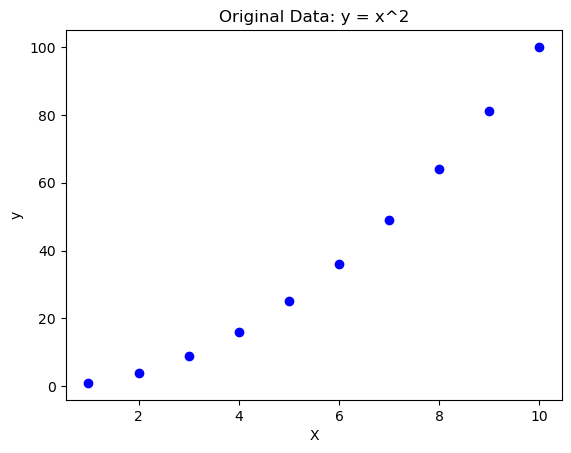

In [3]:
# Create sample data: x from 1 to 10
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y = np.array([1, 4, 9, 16, 25, 36, 49, 64, 81, 100])  # Quadratic relationship (y = x^2)

# Plot the data to visualize the curve
plt.scatter(X, y, color='blue')
plt.title("Original Data: y = x^2")
plt.xlabel("X")
plt.ylabel("y")
plt.show()


In [7]:
X_poly = np.hstack((X, X**2))

In [9]:
X_poly

array([[  1,   1],
       [  2,   4],
       [  3,   9],
       [  4,  16],
       [  5,  25],
       [  6,  36],
       [  7,  49],
       [  8,  64],
       [  9,  81],
       [ 10, 100]])

In [11]:
def cost_function(x, y, w, b):
    m = len(y)
    f_wb = x.dot(w) + b
    error = f_wb - y
    cost = 1/(2*m) + np.sum(error ** 2)

    return cost

In [17]:
# w = np.array([0, 1])
# b = 0
# cost_function(X_poly, y, w, b)

0.05

In [23]:
def gradient_function(x, y, w, b):
    m = len(y)
    f_wb = x.dot(w) + b
    error = f_wb - y
    dj_dw = 1/m * x.T.dot(error)
    dj_db = 1/m * np.sum(error)

    return dj_dw, dj_db

In [29]:
# w = np.array([0, 1])
# b = 0
# gradient_function(X_poly, y, w, b)

(array([0., 0.]), 0.0)

In [51]:
def gradient_descent(x, y, w_in, b_in, a, num_iters, cost_function, gradient_function):
    w = w_in
    b = b_in
    J_history = []
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w -= a * dj_dw
        b -= b * dj_db

        J_history.append(cost_function(x, y, w, b))
        if i % math.ceil(num_iters/10) == 0:
            print(f"iteration: {i:5}, cost: {J_history[-1]}")

    return w, b, J_history

In [65]:
w_initial = np.array([0., 0])
b_initial = 0
alpha = 1.0e-4
iterations = 1000000
w_final, b_final, cost_history = gradient_descent(X_poly, y, w_initial, b_initial, alpha, 
                                                  iterations, cost_function, gradient_function)
print(f"Final value of w is: {w_final.flatten()}")
print(f"Final value of b is: {b_final}")

iteration:     0, cost: 13987.307435791197
iteration: 100000, cost: 0.05
iteration: 200000, cost: 0.05
iteration: 300000, cost: 0.05
iteration: 400000, cost: 0.05
iteration: 500000, cost: 0.05
iteration: 600000, cost: 0.05
iteration: 700000, cost: 0.05
iteration: 800000, cost: 0.05
iteration: 900000, cost: 0.05
Final value of w is: [2.5224e-14 1.0000e+00]
Final value of b is: 0.0


In [67]:
y_pred = X_poly.dot(w_final) + b_final

Text(0, 0.5, 'y')

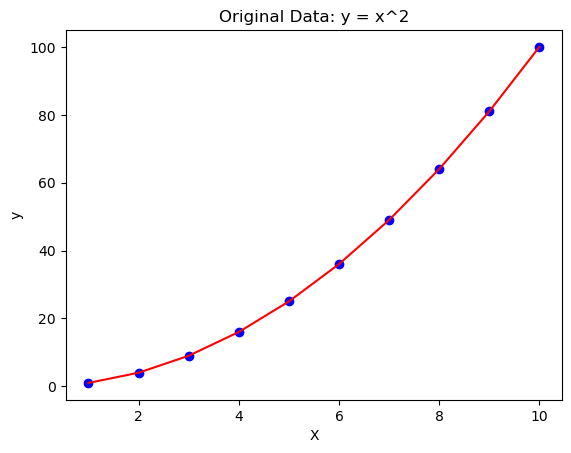

In [69]:
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color = 'red')
plt.title("Original Data: y = x^2")
plt.xlabel("X")
plt.ylabel("y")